<a href="https://colab.research.google.com/github/JoungMinJu/machine_learning/blob/main/9%EC%9E%A5/LSTM%EA%B3%BC_GRU%EC%85%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

고급 순환층인 LSTM과 GRU.
이런 층들은 simpleRNN보다 계산이 복잡하지만 성능이 뛰어나서 순환 신경망에 많이 채택되고 있따. 일반적으로 기본 순환층은 긴 시퀀스를 학습하기 어렵다. 시퀀스가 길 수록 순환되는 은닉상태에 담긴 정보가 점차 희석되기 때문. 따라서 멀리 떨어져있는 단어 정보를 인식하는데 어려울 수 있따. 이를 위해 LSTM과 GRU셀이 발명되었따.


LSTM은 단기기억을 오래 기억하기 위해 고안되었다.LSTM은 구조가 복잡다. 근데 기본개념은 동일함

LSTM에는 입려과 가중치를 곱하고 절편을 더해 활성화 함수를 통과시키는 구조를 여러개 가지고 있다. 이런 계산 결과는 다음 타임스텝에 재사용된다. 

먼저 은닉상태
은닉상태는 입력과 이전 타임스텝의 은닉상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉 상태를 만든다. 이때 기본 순환층과는 달리 시그모이드 활성화 함수를 사용한다. 또 tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만든다. 

LSTM에는 순환되는 상태가 두개이다. 은닉상태 말고 셀 상태라고 부르는 값이 또 있음. 은닉 상태와 달리 셀 상태는 다음 층으로 전달되지 않고 LSTM셀에서 순환만 되는 값이다. 

입력과 은닉상태에 곱해지는 가중치가 다르다. 이 두 작은 셀은 각기 다른 기능을 위해 훈련된다. 그리고 여기에 두개의 작은 셀이 더 추가되어 셀 상태를 만드는데 기여한다. 

입력과 은닉상태를 각기 다른 가중치에 곱한 다음 하나는 시그모이드 함수를 통과시키고 다른 하나는 tanh 함수를  통과시킨다. 그 다음 두 결과를 곱한 후 이전 셀 상태와 더한다. 이 결과가 최종적인 다음 셀 상태가 된다. 

삭제게이트는 셀 상태에 있는 정보를 제거하는 역할
입력 게이트는 새로운 정보를 셀 상태에 추가하는 역할
출력 게이트는 이 셀상태가 다음 은닉상태로 출력되는 역할




In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target)=imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target=train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
#각 샘플의 길이를 100에 맞춘다.(부족하면 패딩 추가)

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq=pad_sequences(train_input, maxlen=100)
val_seq=pad_sequences(val_input, maxlen=100)


In [6]:
from tensorflow import keras
model=keras.Sequential()
model.add(keras.layers.Embedding(500,16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

#걍 simpleRNN을 LSTM으로 바꾼 수준

In [7]:
model.summary()

#LSTM은 작은 셀이 네개 있으므로 파라미터가 4배 증가하여(simplernn대비) 모델 파라미터의 개수가 800개가 되었다.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [9]:
#모델 컴파일 및 훈련
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

#크기는 64개 에포크 횟수는 100임

Epoch 1/100
313/313 [==============================] - 14s 38ms/step - loss: 0.6919 - accuracy: 0.5638 - val_loss: 0.6908 - val_accuracy: 0.5982
Epoch 2/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6881 - accuracy: 0.6328 - val_loss: 0.6851 - val_accuracy: 0.6538
Epoch 3/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6762 - accuracy: 0.6802 - val_loss: 0.6623 - val_accuracy: 0.7058
Epoch 4/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6262 - accuracy: 0.7302 - val_loss: 0.5969 - val_accuracy: 0.7260
Epoch 5/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5797 - accuracy: 0.7329 - val_loss: 0.5678 - val_accuracy: 0.7444
Epoch 6/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5504 - accuracy: 0.7494 - val_loss: 0.5411 - val_accuracy: 0.7582
Epoch 7/100
313/313 [==============================] - 11s 37ms/step - loss: 0.5231 - accuracy: 0.7682 - val_loss: 0.5178 - val_ac

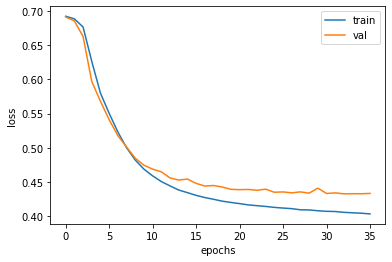

In [11]:
#훈련손실과 검증손실 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()


#기본 순환층보다 LSTM이 과대적합을 억제하면서 훈련을 잘 수행한 것으로 보인다.
#하지만 경우에 따라서는 과대적합을 더 강하게 제어할 필요가 있따. 


과대적합 강하게 제어하기 위해 순환층에 드롭아웃 적용하기


In [12]:
#완전연결 신경망과 합성곱 신경망에 Dropout 클래스 사용해 드롭아웃 적용한 것을 착안
#순환층은 자체적으로 드롭아웃 기능을 제공한다.

#LSTM과 SimpleRNN모두 드롭아웃 매개변수와 recurrent_dropout 매개변수를 가지고 있다.
#드롭아웃 매개변수는 셀의 입력에 드롭아웃을 적용하고 recurrent_dropout은 순환되는 은닉상태에 드롭아웃을 적용한다.
#하지만 기술적인 문제로 인해 recurrent_dropoutㄹ을 사용하면 GPU을 사용하여 모델을 훈련하지 못한다. 이때문에 모델의 훈련속도가 크게 느려진다.
#그래서 dropout만을 사용해볼 것임.

model2=keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.LSTM(8,dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))


In [13]:
#훈련
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])



Epoch 1/100
313/313 [==============================] - 12s 34ms/step - loss: 0.4053 - accuracy: 0.8182 - val_loss: 0.4321 - val_accuracy: 0.8006
Epoch 2/100
313/313 [==============================] - 10s 33ms/step - loss: 0.4046 - accuracy: 0.8191 - val_loss: 0.4325 - val_accuracy: 0.7996
Epoch 3/100
313/313 [==============================] - 10s 34ms/step - loss: 0.4037 - accuracy: 0.8196 - val_loss: 0.4316 - val_accuracy: 0.8018
Epoch 4/100
313/313 [==============================] - 10s 33ms/step - loss: 0.4031 - accuracy: 0.8192 - val_loss: 0.4332 - val_accuracy: 0.8038
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.4027 - accuracy: 0.8198 - val_loss: 0.4391 - val_accuracy: 0.8004
Epoch 6/100
313/313 [==============================] - 10s 33ms/step - loss: 0.4018 - accuracy: 0.8193 - val_loss: 0.4317 - val_accuracy: 0.8044


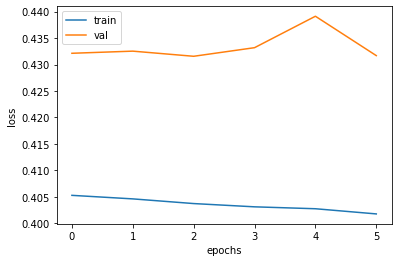

In [14]:
#훈련손실과 검증손실 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()



순환층 여러개 쌓아보기!
근데 순환층의 은닉상태는 샘플의 마지막 타임스텝에 대한 은니상태만 다음 층ㅇ으로 전달한다. 근데 순환층을 쌓게 되면 모든순환층에 순차 데이터가 필요하다. 따라서 앞쪽의 순환층이 모든 타입스탭에 대한 은닉상태를 출력해야한다. 

In [16]:
#케라스의 순환층에서 모든 타입스탭의 은닉상태를 출력하려면 마지막을 제외한 다른 모든 순환층에서 return_sequences 매개변수를 True로 지정하면 된다.
model3=keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True))
model3.add(keras.layers.LSTM(8,dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

#2개의 층을 쌓았다


In [17]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


첫번쨰 LSTM층이 모든 타입스탭(100개)의 은닉상태를 출력하므로 출력크기가 저런데
LSTM 층의 출력 크기는 마지막 타입스탭의 은닉상태만 출력하므로 (None,8)임.


In [19]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 25s 71ms/step - loss: 0.6929 - accuracy: 0.5217 - val_loss: 0.6926 - val_accuracy: 0.5592
Epoch 2/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6917 - accuracy: 0.5624 - val_loss: 0.6906 - val_accuracy: 0.6170
Epoch 3/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6872 - accuracy: 0.6191 - val_loss: 0.6830 - val_accuracy: 0.6364
Epoch 4/100
313/313 [==============================] - 21s 67ms/step - loss: 0.6669 - accuracy: 0.6467 - val_loss: 0.6457 - val_accuracy: 0.6678
Epoch 5/100
313/313 [==============================] - 21s 67ms/step - loss: 0.6057 - accuracy: 0.6967 - val_loss: 0.5767 - val_accuracy: 0.7208
Epoch 6/100
313/313 [==============================] - 21s 67ms/step - loss: 0.5537 - accuracy: 0.7315 - val_loss: 0.5409 - val_accuracy: 0.7372
Epoch 7/100
313/313 [==============================] - 21s 68ms/step - loss: 0.5295 - accuracy: 0.7405 - val_loss: 0.5177 - val_ac

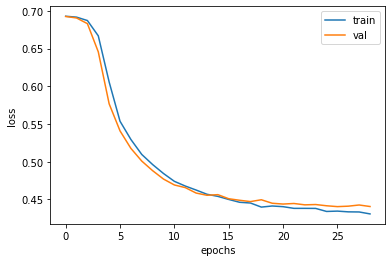

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()


GRU 구조
셀상태를 계산하지 않고 은닉상태 하나만 포함하고 있다.

GRU 셀에는 은닉상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀이 3개 들어있다. 2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh를 사용한다. 여기에서도 은닉상태와 입력에 곱해지는 가중치를 합쳐서 나타내겠다.

GRU는 LSTM보다 가중치가 적어서 계산량이 적지만 LSTM 못지 않은 좋은 성능을 나타낸다. 



In [21]:
model4=keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [22]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________
